## Assignment 2
Explore the internet for an univariant dataset and use this algorithim to train a linear regression model. Use `scikit-learn` too

The dataset I got is a Salary Data. The features of the dataset is Salary and Years of experience

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv('Salary_Data.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [3]:
#Printing the first five rows of the dataset
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [4]:
#Printing the summary of the dataset
data.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

#### We notice that the minimum values of Years of Experience and Salary differs greatly. We see the same issue with the maximum values.
This means that before fitting our regression model, we have to scale to have a reasonable result.

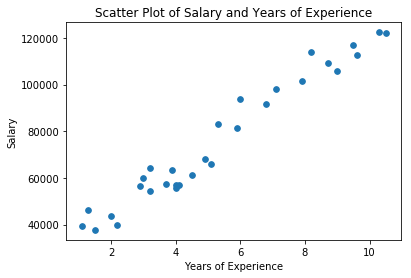

In [5]:
# Lets plot the data to see how they correlate.
plt.scatter(X, y, s=32, marker='o')
plt.title('Scatter Plot of Salary and Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### The plot shows that there is a positive correlation between salary and years of experience of employees

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Here, the test dataset will be one - third of the whole dataset

In [8]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

#As suggested earlier, we have to scale to make modelling fitting reasonable.
# Here, I used the standard scaler

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [9]:
# Fitting Simple Linear Regression to the Training dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#Printing the parameters of the regression model
print(regressor.intercept_)
print(regressor.coef_)

26816.192244
[ 9345.94244312]


In [11]:
# Predicting the Test dataset results
y_pred = regressor.predict(X_test)

### To check if our model rightly predicted values
Assume I want to check for the salary of a new employee who have 5.5 years of experience

In [12]:
# Manual Prediction of the Salary of an employee with 5.5 years of experience
# Using the parameters from the model

Salary = 26816.192244 + 9345.94244312 * 5.5
Salary

78218.87568116

In [13]:
#Using sklearn
#Predicting the Salary for an employee with 5.5 years of experience
regressor.predict(5.5)

# The same result was obtained. This means a new employee with 5.5 years of experience will earn
# 78218.8756812

array([ 78218.8756812])

In [14]:
# Creating a table to compare the actual salary from the test dataset and what the model predicted
regdf = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
regdf

Actual      Predicted
0   37731.0   40835.105909
1  122391.0  123079.399408
2   57081.0   65134.556261
3   63218.0   63265.367772
4  116969.0  115602.645454
5  109431.0  108125.891499
6  112635.0  116537.239698
7   55794.0   64199.962017
8   83088.0   76349.687193
9  101302.0  100649.137545

In [15]:
#Printing the r - squared value for the train dataset
#Note that the r - squared value is also the accuracy value
regressor.score(X_train,y_train)

0.93819000128942776

In [16]:
#Printing the r - squared value for the test dataset
#Note that the r - squared value is also the accuracy value
regressor.score(X_test,y_test)

0.97491544077083525

### Visualising the fitted regression line for train and test dataset

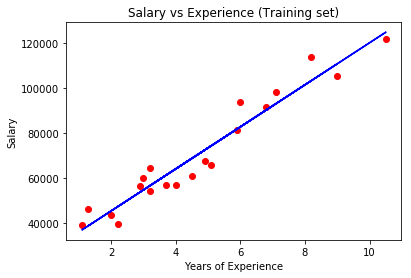

In [17]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

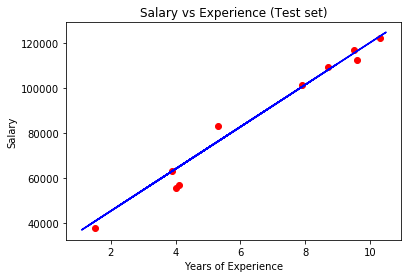

In [18]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Thank You!